<a href="https://colab.research.google.com/github/Sanika2029/Sanika/blob/main/Regularizationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
dataset = pd.read_csv('sat.csv')
dataset

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


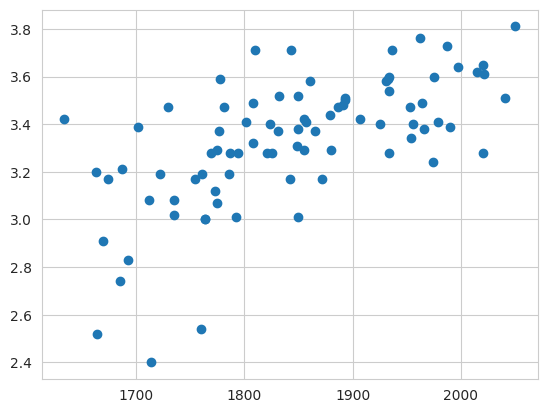

In [3]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.show()

In [4]:
X = dataset.iloc[:,0].values
X

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050])

In [5]:
y = dataset.iloc[:,1].values
y

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(10,activation='relu',input_shape=[1],kernel_regularizer=keras.regularizers.l2(1),kernel_initializer='he_normal'),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X,y,epochs=500)

Epoch 1/500
3/3 [==============================] - 3s 20ms/step - loss: 1333957.7500
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 25257.0918
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 544.4877
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 18.3103
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 14.4846
Epoch 6/500
3/3 [==============================] - 0s 27ms/step - loss: 14.1738
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 13.8874
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 13.6174
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 13.3602
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 13.1256
Epoch 11/500
3/3 [==============================] - 0s 7ms/step - loss: 12.8896
Epoch 12/500
3/3 [==============================] - 0s 7ms/step - loss: 12.7268
Epoch 13/500
3/3 [==================

3/3 [==============================] - 0s 10ms/step


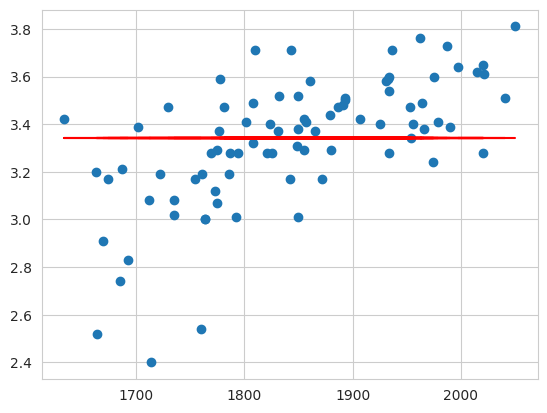

In [8]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(X,model.predict(X),color='red')
plt.show()